In [38]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import plot_tree

In [39]:
# datetime - 每小时日期 + 时间戳  
# season - 1 = 春季，2 = 夏季，3 = 秋季，4 = 冬季 
# holiday - 该天是否被视为假日
# workingday - 该天是否既不是周末也不是假日
# weather - 1：晴朗，少云，部分多云，部分多云
# 2：雾 + 多云，雾 + 碎云，雾 + 少云，雾
# 3：小雪，小雨 + 雷暴 + 零云，小雨 + 零云
# 4：大雨 + 冰雹 + 雷暴 + 雾，雪 + 雾 
# temp - 摄氏度温度
# atemp - “体感”温度（摄氏度）
# moisture - 相对湿度
# windspeed - 风速
# casual - 发起的未注册用户租赁数量
# registered - 发起的注册用户租赁数量
# count - 总租赁数量

In [40]:
#加载数据
train = pd.read_csv(r'D:\编程教程\机器学习与深度学习\machine-learning\实践项目数据\train.csv')
test = pd.read_csv(r'D:\编程教程\机器学习与深度学习\machine-learning\实践项目数据\test.csv')

In [41]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [42]:
test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


In [43]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [44]:
#时间特征工程
def extract_time(df):
    data = pd.to_datetime(df['datetime'])
    df['year']= data.dt.year
    df['month']= data.dt.month
    df['day']= data.dt.day
    df['hour'] = data.dt.hour
    df['weekday'] = data.dt.weekday
    df = df.drop(columns='datetime')
    return df

train = extract_time(train)
test = extract_time(test)

In [45]:
train

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,weekday
0,1,0,0,1,9.84,14.395,81,0.0000,3,13,16,2011,1,1,0,5
1,1,0,0,1,9.02,13.635,80,0.0000,8,32,40,2011,1,1,1,5
2,1,0,0,1,9.02,13.635,80,0.0000,5,27,32,2011,1,1,2,5
3,1,0,0,1,9.84,14.395,75,0.0000,3,10,13,2011,1,1,3,5
4,1,0,0,1,9.84,14.395,75,0.0000,0,1,1,2011,1,1,4,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,4,0,1,1,15.58,19.695,50,26.0027,7,329,336,2012,12,19,19,2
10882,4,0,1,1,14.76,17.425,57,15.0013,10,231,241,2012,12,19,20,2
10883,4,0,1,1,13.94,15.910,61,15.0013,4,164,168,2012,12,19,21,2
10884,4,0,1,1,13.94,17.425,61,6.0032,12,117,129,2012,12,19,22,2


In [46]:
test

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,year,month,day,hour,weekday
0,1,0,1,1,10.66,11.365,56,26.0027,2011,1,20,0,3
1,1,0,1,1,10.66,13.635,56,0.0000,2011,1,20,1,3
2,1,0,1,1,10.66,13.635,56,0.0000,2011,1,20,2,3
3,1,0,1,1,10.66,12.880,56,11.0014,2011,1,20,3,3
4,1,0,1,1,10.66,12.880,56,11.0014,2011,1,20,4,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6488,1,0,1,2,10.66,12.880,60,11.0014,2012,12,31,19,0
6489,1,0,1,2,10.66,12.880,60,11.0014,2012,12,31,20,0
6490,1,0,1,1,10.66,12.880,60,11.0014,2012,12,31,21,0
6491,1,0,1,1,10.66,13.635,56,8.9981,2012,12,31,22,0


In [47]:
train['is_weekend']= train['weekday'].apply(lambda x:1 if x>=5 else 0)
train['is_peak_hour']= train['hour'].apply(lambda x:1 if 7<=x<=9 else 0)
test['is_weekend']= test['weekday'].apply(lambda x:1 if x>=5 else 0)
test['is_peak_hour']= test['hour'].apply(lambda x:1 if 7<=x<=9 else 0)

<Axes: >

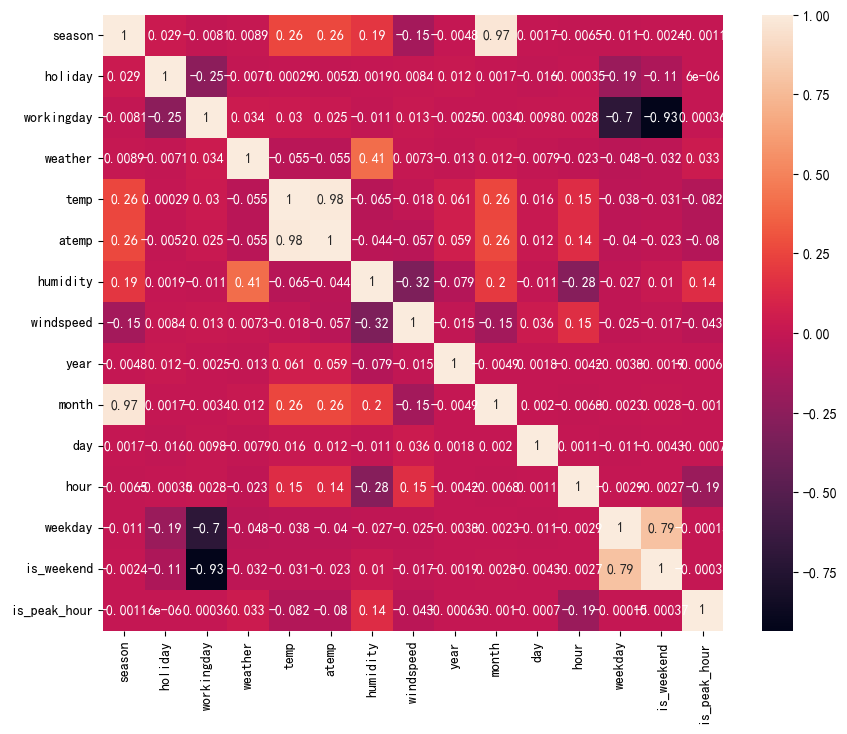

In [48]:
#画一个热力图
import seaborn as sns
plt.rcParams['font.sans-serif'] = ['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False #用来正常显示负号
plt.figure(figsize=(10,8))
#annot=True 能看到相关性数字
sns.heatmap(train.drop(columns=['casual','registered','count']).corr(),annot=True)

In [49]:
#temp和atemp 之间的相关性 很高 几乎拥有相同的信息 所以可以考虑去掉其中一个
#season 和 month 之间 高度相关 所以可以考虑去掉其中一个

In [50]:
X= train.drop(columns=['casual','registered','count','atemp','month','day','weekday'])

In [51]:
y= train['count']

In [52]:
X_test = test.drop(columns=['atemp','month','day','weekday'])

In [53]:
#训练随机森林模型
#n_jobs=-1 开启所有可用的CPU核心
model = RandomForestRegressor(n_estimators=100,n_jobs=-1)
model.fit(X,y)

,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [54]:
y_pred = model.predict(X_test)
y_pred

array([  9.69      ,   4.28      ,   3.71      , ..., 110.74      ,
        96.10166667,  58.255     ])

In [55]:
#生成提交文件
sample = pd.read_csv(r'D:\编程教程\机器学习与深度学习\machine-learning\实践项目数据\sampleSubmission.csv')
sample['count'] = y_pred.astype(int)
sample

,datetime,count
0,2011-01-20 00:00:00,9
1,2011-01-20 01:00:00,4
2,2011-01-20 02:00:00,3
3,2011-01-20 03:00:00,3
4,2011-01-20 04:00:00,2
...,...,...
6488,2012-12-31 19:00:00,217
6489,2012-12-31 20:00:00,153
6490,2012-12-31 21:00:00,110
6491,2012-12-31 22:00:00,96


In [56]:
sample.to_csv('提交.csv',index=False)